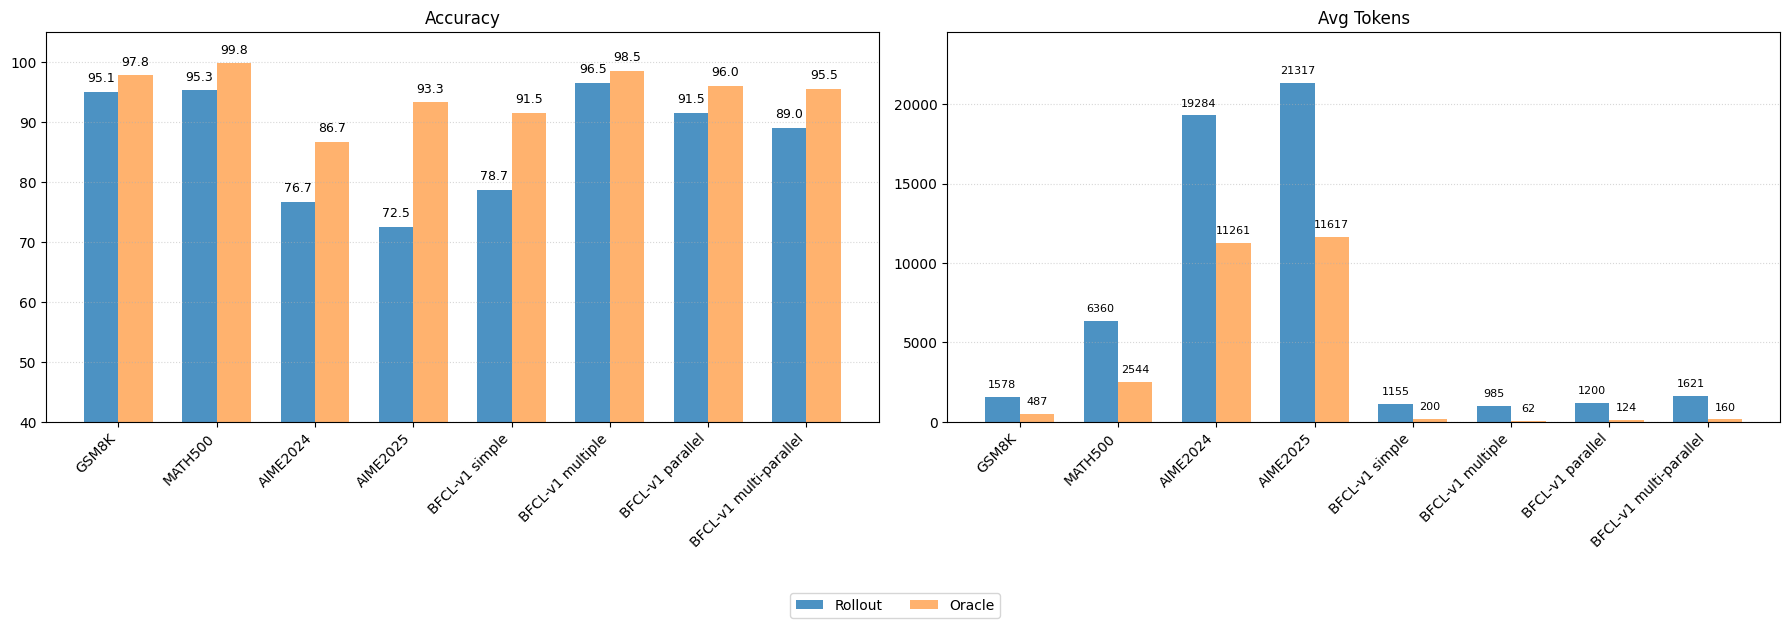

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

all_data = [
    {
        "Category": "GSM8K",
        "Base Acc": 95.1,
        "Oracle Acc": 97.8,
        "Base Tok": 1578,
        "Delta Tok": -0.691,
    },
    {
        "Category": "MATH500",
        "Base Acc": 95.3,
        "Oracle Acc": 99.8,
        "Base Tok": 6360,
        "Delta Tok": -0.600,
    },
    {
        "Category": "AIME2024",
        "Base Acc": 76.7,
        "Oracle Acc": 86.7,
        "Base Tok": 19284,
        "Delta Tok": -0.416,
    },
    {
        "Category": "AIME2025",
        "Base Acc": 72.5,
        "Oracle Acc": 93.3,
        "Base Tok": 21317,
        "Delta Tok": -0.455,
    },
    # Tool Usage-BFCL
    {
        "Category": "BFCL-v1 simple",
        "Base Acc": 78.7,
        "Oracle Acc": 91.5,
        "Base Tok": 1155,
        "Delta Tok": -0.826,
    },
    {
        "Category": "BFCL-v1 multiple",
        "Base Acc": 96.5,
        "Oracle Acc": 98.5,
        "Base Tok": 985,
        "Delta Tok": -0.937,
    },
    {
        "Category": "BFCL-v1 parallel",
        "Base Acc": 91.5,
        "Oracle Acc": 96.0,
        "Base Tok": 1200,
        "Delta Tok": -0.896,
    },
    {
        "Category": "BFCL-v1 multi-parallel",
        "Base Acc": 89.0,
        "Oracle Acc": 95.5,
        "Base Tok": 1621,
        "Delta Tok": -0.901,
    },
]

df_all = pd.DataFrame(all_data)
df_all["Rollout Accuracy (%)"] = df_all["Base Acc"]
df_all["Oracle Accuracy (%)"] = df_all["Oracle Acc"]
df_all["Rollout Avg Tokens"] = df_all["Base Tok"]
df_all["Avg First Correct Tokens"] = df_all["Base Tok"] * (1 + df_all["Delta Tok"])
plot_df = df_all.copy()

categories = plot_df["Category"].unique().tolist()
n_cat = len(categories)

x = np.arange(n_cat)
bar_width = 0.35
max_acc = 100

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True)

model_df = plot_df.set_index("Category")
rollout_vals = [
    model_df.loc[c, "Rollout Accuracy (%)"] if c in model_df.index else 0
    for c in categories
]
oracle_vals = [
    model_df.loc[c, "Oracle Accuracy (%)"] if c in model_df.index else 0
    for c in categories
]

max_bar1 = max(rollout_vals + oracle_vals + [max_acc])
bars1 = axes[0].bar(
    x - bar_width / 2, rollout_vals, width=bar_width, label="Rollout", alpha=0.8
)
bars2 = axes[0].bar(
    x + bar_width / 2, oracle_vals, width=bar_width, label="Oracle", alpha=0.6
)

axes[0].set_xticks(x)
axes[0].set_xticklabels(categories, rotation=45, ha="right")
axes[0].set_ylim(40, 105)
axes[0].set_yticks(np.arange(40, 101, 10))
axes[0].set_title("Accuracy")
axes[0].grid(axis="y", linestyle=":", alpha=0.5)

for bar in bars1:
    height = bar.get_height()
    axes[0].annotate(
        f"{height:.1f}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=9,
    )
for bar in bars2:
    height = bar.get_height()
    axes[0].annotate(
        f"{height:.1f}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=9,
    )

rollout_tokens = [
    model_df.loc[c, "Rollout Avg Tokens"] if c in model_df.index else 0
    for c in categories
]
oracle_tokens = [
    model_df.loc[c, "Avg First Correct Tokens"] if c in model_df.index else 0
    for c in categories
]

max_tokens = max(max(oracle_tokens), max(rollout_tokens), 100)
max_bar2 = max(rollout_tokens + oracle_tokens + [max_tokens])

bars3 = axes[1].bar(
    x - bar_width / 2, rollout_tokens, width=bar_width, label="Rollout", alpha=0.8
)
bars4 = axes[1].bar(
    x + bar_width / 2, oracle_tokens, width=bar_width, label="Oracle", alpha=0.6
)

axes[1].set_xticks(x)
axes[1].set_xticklabels(categories, rotation=45, ha="right")
axes[1].set_ylim(0, max_bar2 * 1.15)
axes[1].set_title("Avg Tokens")
axes[1].grid(axis="y", linestyle=":", alpha=0.5)

# Add value labels
for bar in bars3:
    height = bar.get_height()
    axes[1].annotate(
        f"{int(height)}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=8,
    )
for bar in bars4:
    height = bar.get_height()
    axes[1].annotate(
        f"{int(height)}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=8,
    )

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=2)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("oracle_analysis.pdf", format="pdf", bbox_inches="tight")

plt.show()